In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

### Support Vector Classifier

In [6]:
X, y = make_blobs(n_samples=2000, n_features=2, centers=2, cluster_std=1.0, random_state=40)

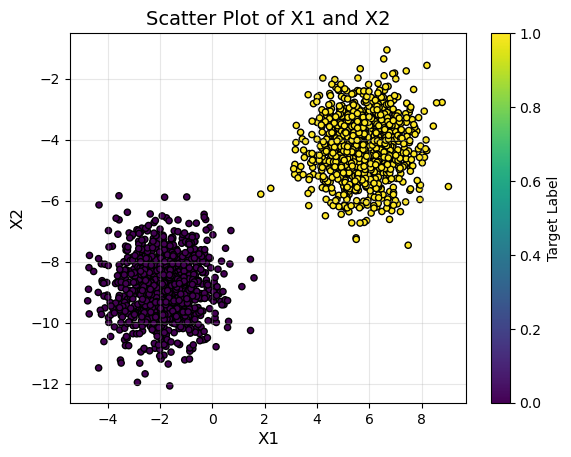

In [8]:
X1=X[:,0]
X2=X[:,1]
plt.scatter(X1,X2, c=y, cmap='viridis', s=20, edgecolor='k')
plt.title('Scatter Plot of X1 and X2', fontsize=14)
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.colorbar(label='Target Label')
plt.grid(alpha=0.3)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

print("Training set shape:", X_train_normalized.shape, y_train.shape)
print("Testing set shape:", X_test_normalized.shape, y_test.shape)

Training set shape: (1400, 2) (1400,)
Testing set shape: (600, 2) (600,)


In [14]:
svc = SVC(random_state=0)
param_grid = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10, 100, 1000]  
}
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit the model using GridSearchCV
grid_search.fit(X_train_normalized, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             scoring='accuracy')

In [16]:
results = pd.DataFrame(grid_search.cv_results_)
sorted_results = results[[
     "rank_test_score", 
     "mean_test_score", 
     "param_kernel",
     "param_C"
 ]].sort_values("rank_test_score")
sorted_results

,rank_test_score,mean_test_score,param_kernel,param_C
0,1,1.0,linear,0.1
1,1,1.0,linear,1.0
2,1,1.0,linear,10.0
3,1,1.0,linear,100.0
4,1,1.0,linear,1000.0


In [18]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best model
print("Best Model:")
print(best_model)

# Print the best parameters
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Model:
SVC(C=0.1, kernel='linear', random_state=0)

Best Parameters:
C: 0.1
kernel: linear


In [20]:
y_test_pred = best_model.predict(X_test_normalized)

test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 1.0


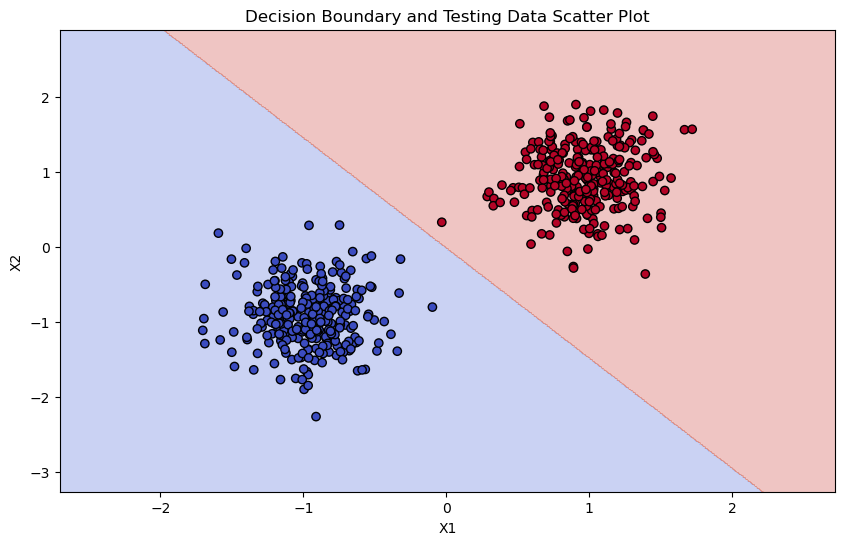

In [22]:
h = 0.01  # Step size in the mesh
x_min, x_max = X_test_normalized[:, 0].min() - 1, X_test_normalized[:, 0].max() + 1
y_min, y_max = X_test_normalized[:, 1].min() - 1, X_test_normalized[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict over the mesh grid
Z = grid_search.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and testing data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_normalized[:, 0], X_test_normalized[:, 1], c=y_test, cmap='coolwarm', edgecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary and Testing Data Scatter Plot')
plt.show()

### Application: 2D synthetic cluster

In [24]:
X, y = make_moons(n_samples=5000, noise=0.2, random_state=0)

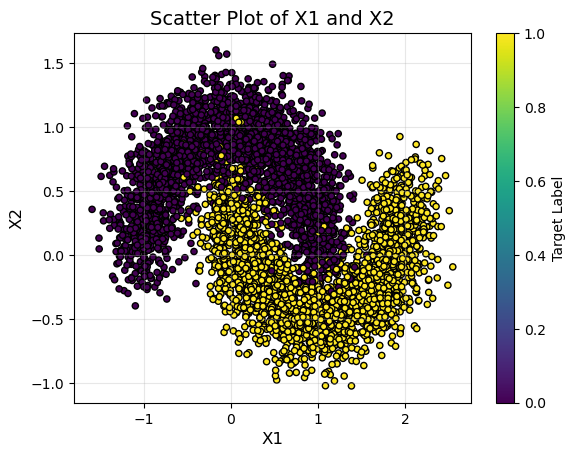

In [26]:
X1=X[:,0]
X2=X[:,1]
plt.scatter(X1,X2, c=y, cmap='viridis', s=20, edgecolor='k')
plt.title('Scatter Plot of X1 and X2', fontsize=14)
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.colorbar(label='Target Label')
plt.grid(alpha=0.3)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

print("Training set shape:", X_train_normalized.shape, y_train.shape)
print("Testing set shape:", X_test_normalized.shape, y_test.shape)

Training set shape: (3500, 2) (3500,)
Testing set shape: (1500, 2) (1500,)


In [30]:
svc = SVC(random_state=0)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['poly', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.5, 1.0]
}


random_search = RandomizedSearchCV(
    svc, 
    param_distributions=param_grid, 
    n_iter=20, 
    cv=3, 
    scoring='accuracy', 
    random_state=42
)

random_search.fit(X_train_normalized, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(random_state=0), n_iter=20,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'coef0': [0.0, 0.5, 1.0],
                                        'degree': [2, 3, 4],
                                        'gamma': [0.001, 0.01, 0.1, 1],
                                        'kernel': ['poly', 'rbf']},
                   random_state=42, scoring='accuracy')

In [32]:
import pandas as pd
results = pd.DataFrame(random_search.cv_results_)

sorted_results = results[[
     "rank_test_score", 
     "mean_test_score", 
     "param_kernel",
     "param_gamma", 
     "param_degree", 
     "param_coef0",
     "param_C"
 ]].sort_values("rank_test_score")

# Print the sorted results
sorted_results

,rank_test_score,mean_test_score,param_kernel,param_gamma,param_degree,param_coef0,param_C
13,1,0.968000,rbf,1.000,3,1.0,100.0
6,2,0.966571,poly,1.000,4,0.5,0.1
18,3,0.965429,rbf,0.100,4,0.0,100.0
1,4,0.953713,rbf,0.100,3,0.0,10.0
4,4,0.953713,rbf,0.100,3,0.5,10.0
12,6,0.926000,poly,0.100,4,0.5,1.0
8,7,0.914000,rbf,0.100,2,0.0,1.0
0,8,0.877716,rbf,0.100,4,0.5,0.1
16,8,0.877716,rbf,0.100,2,0.0,0.1
9,10,0.868001,rbf,0.010,2,1.0,10.0


In [34]:
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best model
print("Best Model:")
print(best_model)

# Print the best parameters
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Model:
SVC(C=100, coef0=1.0, gamma=1, random_state=0)

Best Parameters:
kernel: rbf
gamma: 1
degree: 3
coef0: 1.0
C: 100


In [36]:
y_test_pred = best_model.predict(X_test_normalized)

test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.97


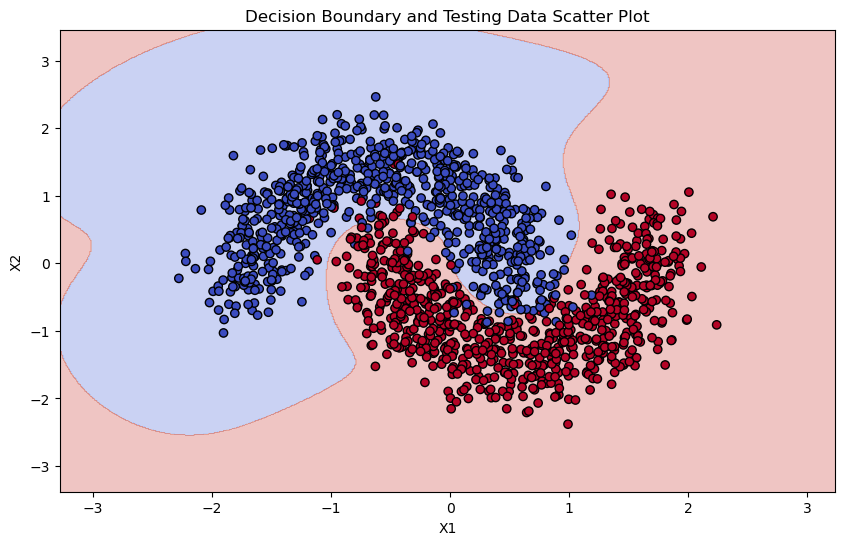

In [38]:
h = 0.01  # Step size in the mesh
x_min, x_max = X_test_normalized[:, 0].min() - 1, X_test_normalized[:, 0].max() + 1
y_min, y_max = X_test_normalized[:, 1].min() - 1, X_test_normalized[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict over the mesh grid
Z = random_search.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and testing data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_normalized[:, 0], X_test_normalized[:, 1], c=y_test, cmap='coolwarm', edgecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary and Testing Data Scatter Plot')
plt.show()

In [40]:
yX = pd.read_parquet("pulsar_stars.parquet")
yX.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [42]:
grouped = yX.groupby('Class')
grouped.describe().T

Class                                            0            1
Mean of the integrated profile count  16259.000000  1639.000000
                               mean     116.562726    56.690608
                               std       17.475932    30.007707
                               min       17.210938     5.812500
                               25%      105.253906    31.777344
...                                            ...          ...
Skewness of the DM-SNR curve   min       -1.976976    -1.874683
                               25%       47.580165    -0.228294
                               50%       90.674592     2.585145
                               75%      145.827223    13.469687
                               max     1191.000837  1017.383180

[64 rows x 2 columns]

In [44]:
X = yX.drop(["Class"], axis=1)
y=yX[["Class"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (14318, 8) (14318, 1)
Testing set shape: (3580, 8) (3580, 1)


In [46]:
svc = SVC(random_state=0)
param_grid = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10, 100, 1000]  
}
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit the model using GridSearchCV
grid_search.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             scoring='accuracy')

In [48]:
results = pd.DataFrame(grid_search.cv_results_)
sorted_results = results[[
     "rank_test_score", 
     "mean_test_score", 
     "param_kernel",
     "param_C"
 ]].sort_values("rank_test_score")
sorted_results

,rank_test_score,mean_test_score,param_kernel,param_C
2,1,0.979187,linear,10.0
3,1,0.979187,linear,100.0
4,1,0.979187,linear,1000.0
1,4,0.979117,linear,1.0
0,5,0.978000,linear,0.1


In [50]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best model
print("Best Model:")
print(best_model)

# Print the best parameters
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Model:
SVC(C=10, kernel='linear', random_state=0)

Best Parameters:
C: 10
kernel: linear


In [52]:
y_test_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.979050279329609


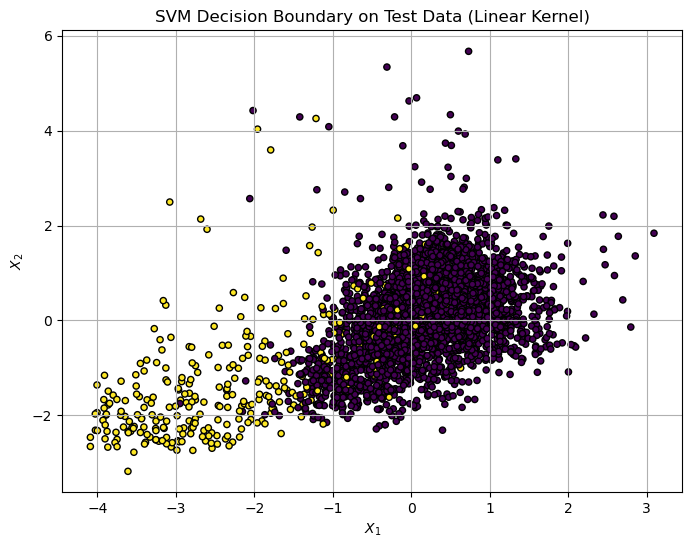

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.values.ravel(), cmap='viridis', edgecolor='k', s=20)
plt.title('SVM Decision Boundary on Test Data (Linear Kernel)')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)
plt.show()


In [60]:
svc = SVC(random_state=0)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['poly', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.5, 1.0]
}


random_search = RandomizedSearchCV(
    svc, 
    param_distributions=param_grid, 
    n_iter=20, 
    cv=3, 
    scoring='accuracy', 
    random_state=42
)

random_search.fit(X_train, np.ravel(y_train))

RandomizedSearchCV(cv=3, estimator=SVC(random_state=0), n_iter=20,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'coef0': [0.0, 0.5, 1.0],
                                        'degree': [2, 3, 4],
                                        'gamma': [0.001, 0.01, 0.1, 1],
                                        'kernel': ['poly', 'rbf']},
                   random_state=42, scoring='accuracy')

In [62]:
import pandas as pd
results = pd.DataFrame(random_search.cv_results_)

sorted_results = results[[
     "rank_test_score", 
     "mean_test_score", 
     "param_kernel",
     "param_gamma", 
     "param_degree", 
     "param_coef0",
     "param_C"
 ]].sort_values("rank_test_score")

# Print the sorted results
sorted_results

,rank_test_score,mean_test_score,param_kernel,param_gamma,param_degree,param_coef0,param_C
18,1,0.980025,rbf,0.100,4,0.0,100.0
1,2,0.979187,rbf,0.100,3,0.0,10.0
4,2,0.979187,rbf,0.100,3,0.5,10.0
7,4,0.978978,poly,0.100,2,0.5,10.0
9,5,0.978698,rbf,0.010,2,1.0,10.0
12,6,0.978558,poly,0.100,4,0.5,1.0
8,7,0.978349,rbf,0.100,2,0.0,1.0
2,8,0.977651,poly,0.001,4,0.5,100.0
6,9,0.977092,poly,1.000,4,0.5,0.1
13,10,0.976254,rbf,1.000,3,1.0,100.0


In [64]:
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best model
print("Best Model:")
print(best_model)

# Print the best parameters
print("\nBest Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Model:
SVC(C=100, degree=4, gamma=0.1, random_state=0)

Best Parameters:
kernel: rbf
gamma: 0.1
degree: 4
coef0: 0.0
C: 100


In [66]:
y_test_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9807262569832402


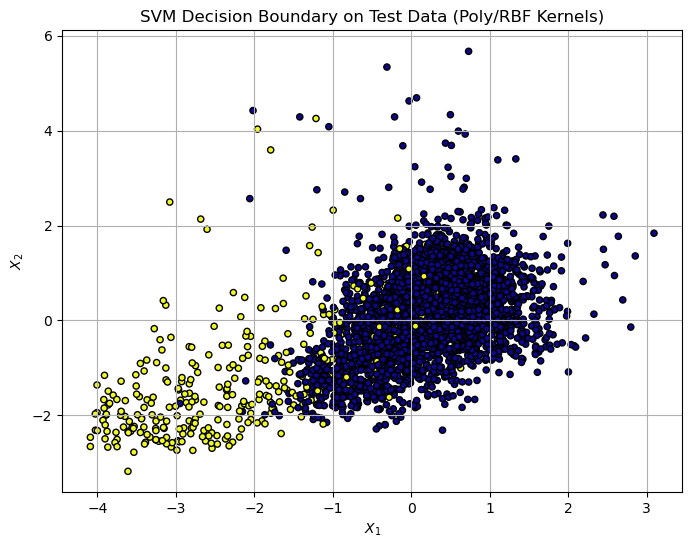

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.values.ravel(), cmap='plasma', edgecolor='k', s=20)
plt.title('SVM Decision Boundary on Test Data (Poly/RBF Kernels)')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid(True)
plt.show()

Linear Kernel Test Accuracy: 0.979050279329609
Poly/RBF Kernel Test Accuracy: 0.9807262569832402
Poly/RBF kernel performed better.